In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")

In [3]:
midwest = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv', error_bad_lines=False)
midwest.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


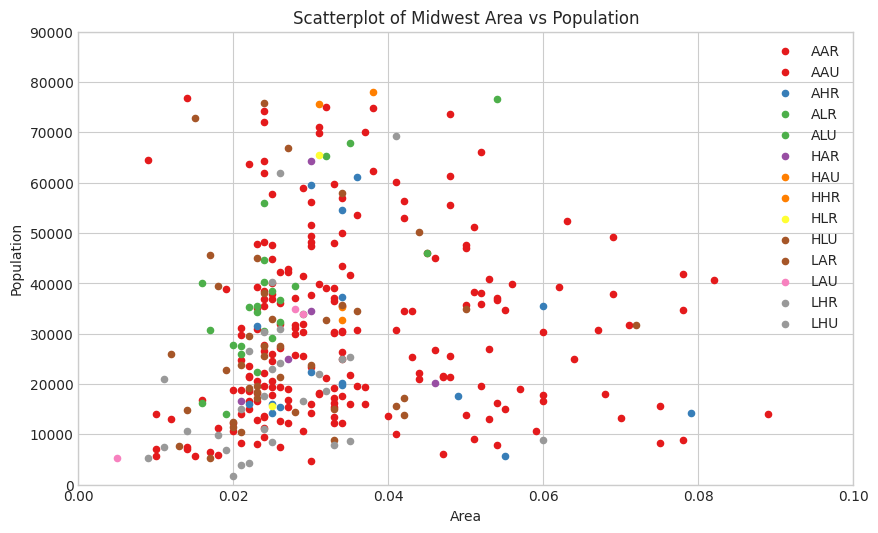

In [4]:
# Scatterplot
# Create as many colors as there are unique midwest['category']
# 
categories = np.unique(midwest['category'])
colors = [plt.cm.Set1(i / float(len(categories) - 1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area','poptotal',data=midwest.loc[midwest.category == category, :],s=20,c=colors[i],
    label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1),ylim=(0, 90000),)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Area', fontdict={'fontsize': 10})
plt.ylabel('Population', fontdict={'fontsize': 10})
plt.title("Scatterplot of Midwest Area vs Population", fontsize=12)
plt.legend(fontsize=10)
plt.show()

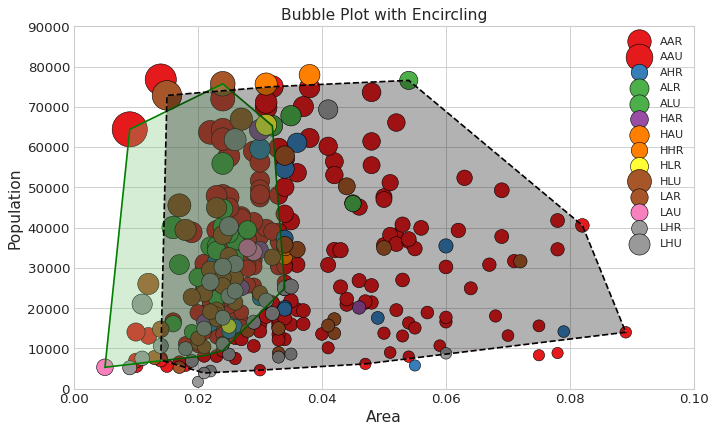

In [5]:
# Bubble Chart with Encircling

from matplotlib import patches
from scipy.spatial import ConvexHull

sns.set_style("whitegrid")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.Set1(i / float(len(categories) - 1)) for i in range(len(categories))]

#Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
for i, category in enumerate(categories):
    plt.scatter('area','poptotal',
                data=midwest.loc[midwest.category == category, :],
                s='dot_size',c=colors[i],
                label=str(category),
                edgecolors='black',
                linewidths=.5)

# Encircling
def encircle(x, y, ax=None, **kw):  #Circle the check points   
    if not ax: ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data1 = midwest.loc[midwest.state == 'IN', :]
encircle(midwest_encircle_data1.area, midwest_encircle_data1.poptotal, ec="pink", fc="#74C476", alpha=0.3)
encircle(midwest_encircle_data1.area, midwest_encircle_data1.poptotal, ec="g", fc="none", linewidth=1.5)

midwest_encircle_data6 = midwest.loc[midwest.state == 'WI', :]
encircle(midwest_encircle_data6.area, midwest_encircle_data6.poptotal, ec="pink", fc="black", alpha=0.3)
encircle(midwest_encircle_data6.area, midwest_encircle_data6.poptotal, ec="black", fc="none", linewidth=1.5, linestyle='--')

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Area', fontdict={'fontsize': 14})
plt.ylabel('Population', fontdict={'fontsize': 14})
plt.title("Bubble Plot with Encircling", fontsize=14)
plt.legend(fontsize=10)
plt.show()

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv')
df.head()




,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<Figure size 3000x2000 with 0 Axes>

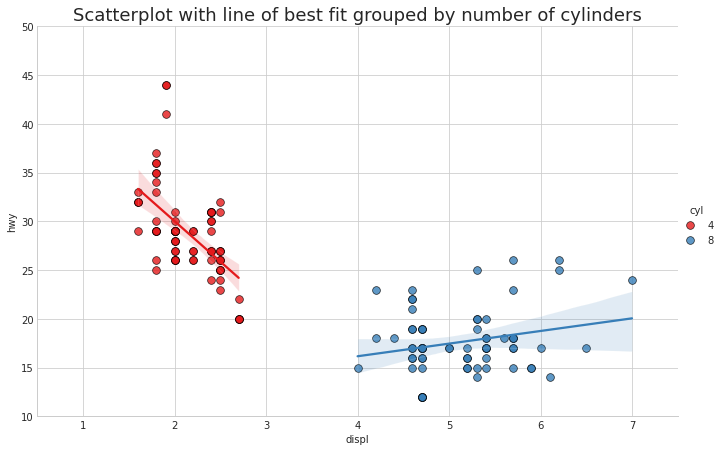

In [7]:
# Scatterplot with regression lines
plt.figure(dpi=500)

df_select = df.loc[df.cyl.isin([4, 8]), :]

# Plot

gridobj = sns.lmplot(
    x="displ",
    y="hwy",
    hue="cyl",
    data=df_select,
    height=7,
    aspect=1.6,  #robust=True, 
    palette='Set1',
    scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
sns.set(style="whitegrid", font_scale=1.5)
gridobj.set(xlim=(0.5, 7.5), ylim=(10, 50))
gridobj.fig.set_size_inches(10, 6)
plt.title("Scatterplot with line of best fit grouped by number of cylinders")
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tools/numdiff.py:51: DeprecationWarning: `np.MachAr` is deprecated (NumPy 1.22).
  EPS = np.MachAr().eps


<Figure size 1200x800 with 0 Axes>

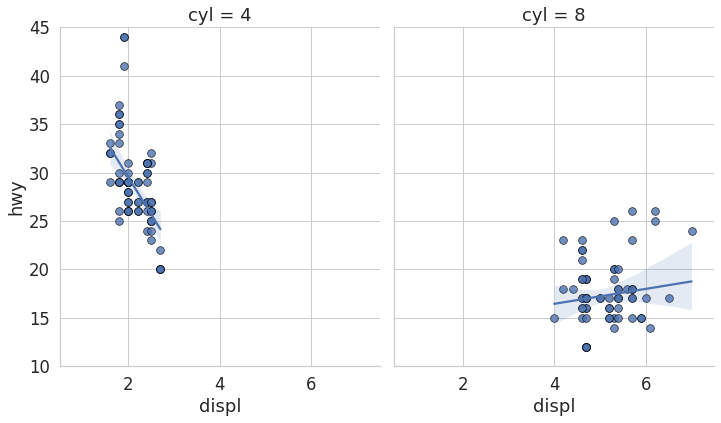

In [8]:
# Scatterplot with facet on column and regression lines

plt.figure(dpi=200)

df_select = df.loc[df.cyl.isin([4, 8]), :]

# Each line in its own column
gridobj = sns.lmplot(x="displ",
                     y="hwy",
                     data=df_select,
                     height=7,
                     robust=True,
                     palette='Set1',
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
sns.set(style="whitegrid", font_scale=1.5)
gridobj.set(xlim=(0.5, 7.5), ylim=(10, 45))
gridobj.fig.set_size_inches(10, 6)
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


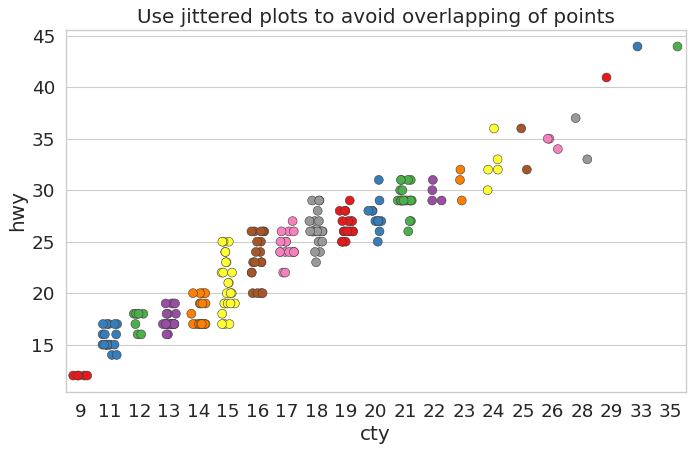

In [9]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
sns.stripplot(df.cty,
              df.hwy,
              jitter=0.25,
              size=8,
              ax=ax,
              linewidth=.5,
              palette='Set1')

# Decorations
plt.title('Use jittered plots to avoid overlapping of points')
plt.show()

In [20]:
mpg = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


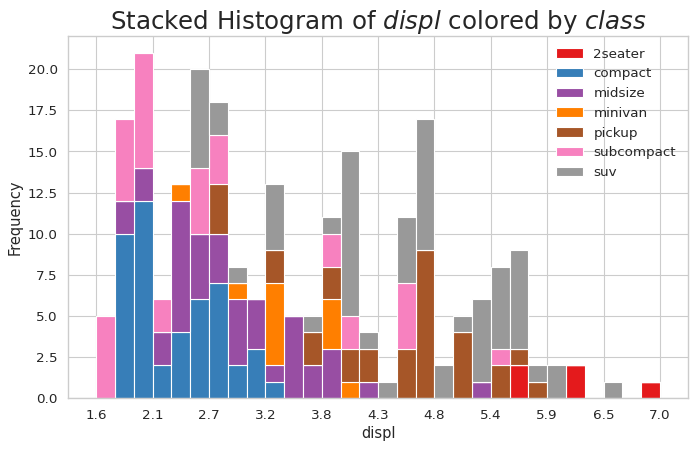

In [21]:
x_var = 'displ'
groupby_var = 'class'
df_agg = mpg.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [mpg[x_var].values.tolist() for i, mpg in df_agg]

# Draw
plt.figure(figsize=(10, 6), dpi=80)
colors = [plt.cm.Set1(i / float(len(vals) - 1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals,
                            30,
                            stacked=True,
                            density=False,
                            color=colors[:len(vals)])

# Decoration
plt.legend({
    group: col
    for group, col in zip(
        np.unique(mpg[groupby_var]).tolist(), colors[:len(vals)])
})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$",
          fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
#plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b, 1) for b in bins[::3]])
plt.show()

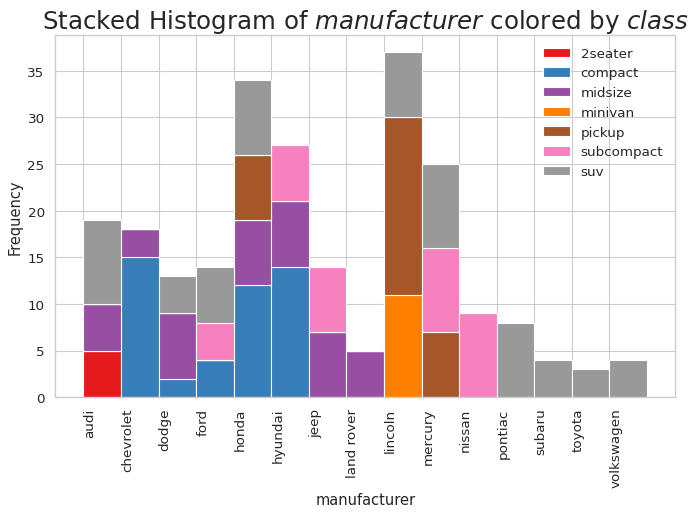

In [22]:
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = mpg.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [mpg[x_var].values.tolist() for i, mpg in df_agg]

# Draw
plt.figure(figsize=(10, 6), dpi=80)
colors = [plt.cm.Set1(i / float(len(vals) - 1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals,
                            mpg[x_var].unique().__len__(),
                            stacked=True,
                            density=False,
                            color=colors[:len(vals)])

# Decoration
plt.legend({
    group: col
    for group, col in zip(
        np.unique(mpg[groupby_var]).tolist(), colors[:len(vals)])
})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$",
          fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim=(0, 40)
plt.xticks(ticks=bins[:-1],
           labels=np.unique(mpg[x_var]).tolist(),
           rotation=90,
           horizontalalignment='left')
plt.show()

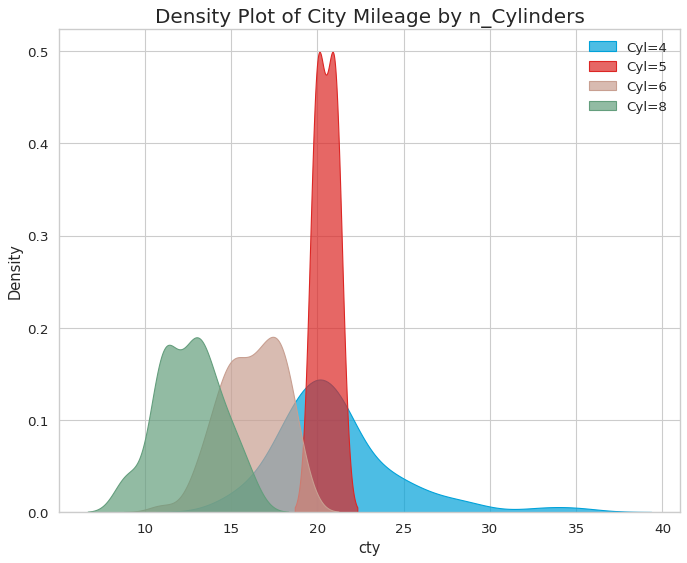

In [23]:
# Draw Plot
plt.figure(figsize=(10, 8), dpi=80)
sns.kdeplot(mpg.loc[mpg['cyl'] == 4, "cty"],
            shade=True,
            color="#01a2d9",
            label="Cyl=4",
            alpha=.7)
sns.kdeplot(mpg.loc[mpg['cyl'] == 5, "cty"],
            shade=True,
            color="#dc2624",
            label="Cyl=5",
            alpha=.7)
sns.kdeplot(mpg.loc[mpg['cyl'] == 6, "cty"],
            shade=True,
            color="#C89F91",
            label="Cyl=6",
            alpha=.7)
sns.kdeplot(mpg.loc[mpg['cyl'] == 8, "cty"],
            shade=True,
            color="#649E7D",
            label="Cyl=8",
            alpha=.7)

# Decoration
sns.set(style="whitegrid", font_scale=1.1)
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=18)
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:2857: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  pct = percentile_func(x, rng, axis=axis, interpolation=interpolation,
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

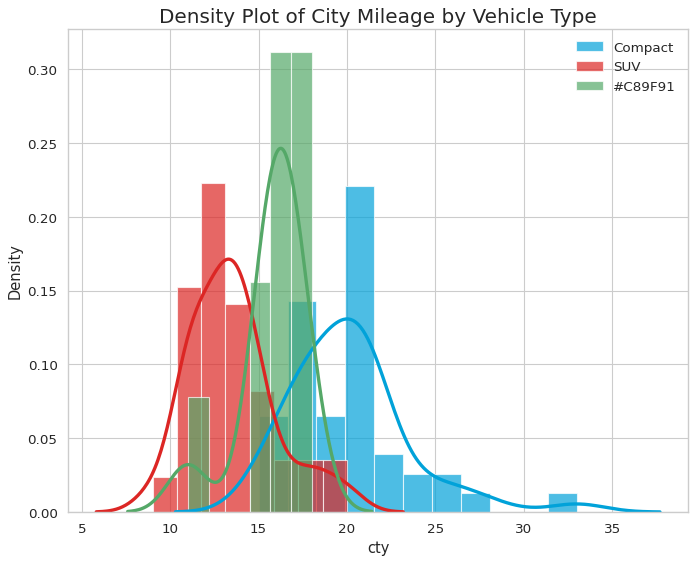

In [24]:
# Draw Plot
plt.figure(figsize=(10, 8), dpi=80)
sns.distplot(mpg.loc[mpg['class'] == 'compact', "cty"],
             color="#01a2d9",
             label="Compact",
             hist_kws={'alpha': .7},
             kde_kws={'linewidth': 3})
sns.distplot(mpg.loc[mpg['class'] == 'suv', "cty"],
             color="#dc2624",
             label="SUV",
             hist_kws={'alpha': .7},
             kde_kws={'linewidth': 3})
sns.distplot(mpg.loc[mpg['class'] == 'minivan', "cty"],
             color="g",
             label="#C89F91",
             hist_kws={'alpha': .7},
             kde_kws={'linewidth': 3})
plt.ylim=(0, 0.35)

# Decoration
sns.set(style="whitegrid", font_scale=1.1)
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=18)
plt.legend()
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Figure size 800x480 with 0 Axes>

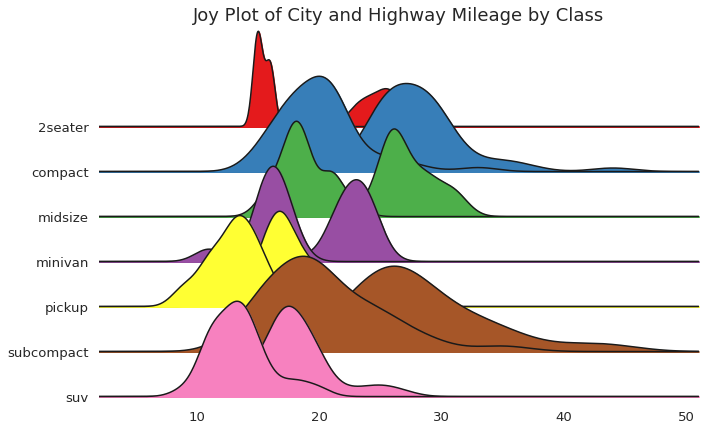

In [25]:
!pip install joypy  #install the package
import joypy

# Draw Plot
plt.figure(figsize=(10, 6), dpi=80)
fig, axes = joypy.joyplot(mpg,
                          column=['hwy', 'cty'],
                          by="class",
                          ylim='own',
                          colormap=plt.cm.Set1,
                          figsize=(10, 6))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=18)
plt.show()

In [26]:
econ = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/economics.csv', parse_dates=['date'])
econ.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


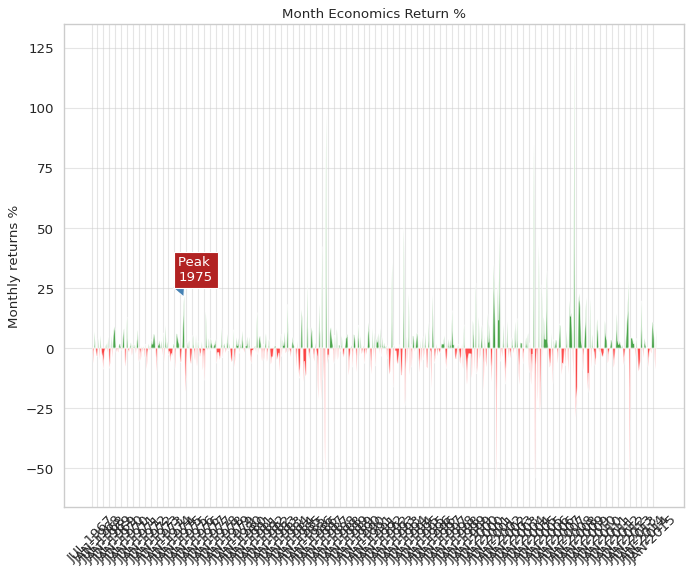

In [27]:
# Area Chart
x = np.arange(econ.shape[0])
y_returns = (econ.psavert.diff().fillna(0) / econ.psavert.shift(1)).fillna(0) * 100

# Plot
plt.figure(figsize=(10, 8), dpi=80)
plt.fill_between(x[1:],
                 y_returns[1:],
                 0,
                 where=y_returns[1:] >= 0,
                 facecolor='green',
                 interpolate=True,
                 alpha=0.7)
plt.fill_between(x[1:],
                 y_returns[1:],
                 0,
                 where=y_returns[1:] <= 0,
                 facecolor='red',
                 interpolate=True,
                 alpha=0.7)

# Annotate
plt.annotate('Peak \n1975',
             xy=(94.0, 21.0),
             xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05),
             fontsize=12,
             color='white')

# Decorations
xtickvals = [
    str(m)[:3].upper() + "-" + str(y)
    for y, m in zip(econ.date.dt.year, econ.date.dt.month_name())
]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6],
                          rotation=90,
                          fontdict={
                              'horizontalalignment': 'center',
                              'verticalalignment': 'center_baseline',
                              'size': 12
                          })
# plt.ylim(-20, 32)
# plt.xlim(1, 100)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.title("Month Economics Return %", fontsize=12)
plt.ylabel('Monthly returns %', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

<ipython-input-28-7eb9b0b1972a>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())


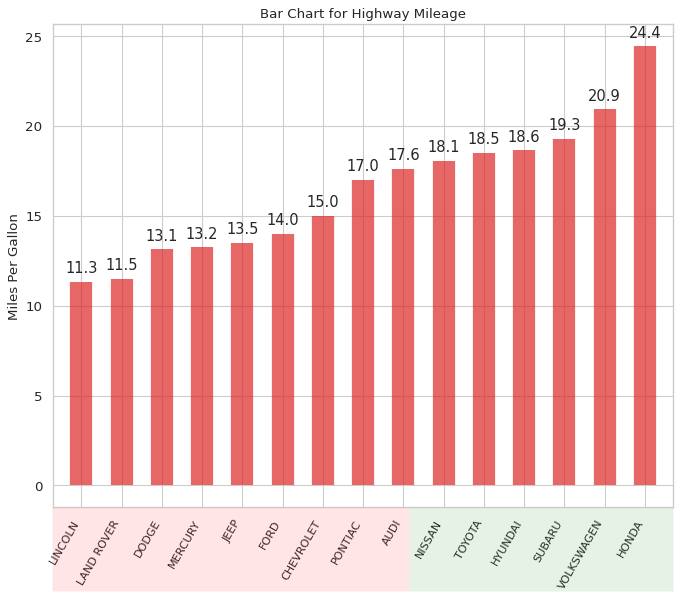

In [28]:
df = mpg[['cty',
             'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 8), facecolor='white', dpi=80)
ax.vlines(x=df.index,
          ymin=0,
          ymax=df.cty,
          color='#dc2624',
          alpha=0.7,
          linewidth=20)

# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty + 0.5, round(cty, 1), horizontalalignment='center')

# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size': 12})
plt.xticks(df.index,
           df.manufacturer.str.upper(),
           rotation=60,
           horizontalalignment='right',
           fontsize=10)
plt.yticks(fontsize=12)
plt.ylabel('Miles Per Gallon', fontsize=12)
plt.ylim = (0, 30)

# Gridline
p1 = patches.Rectangle((.57, -0.005),
                       width=.33,
                       height=.13,
                       alpha=.1,
                       facecolor='green',
                       transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005),
                       width=.446,
                       height=.13,
                       alpha=.1,
                       facecolor='red',
                       transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

<ipython-input-29-614ec11ce1cc>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())


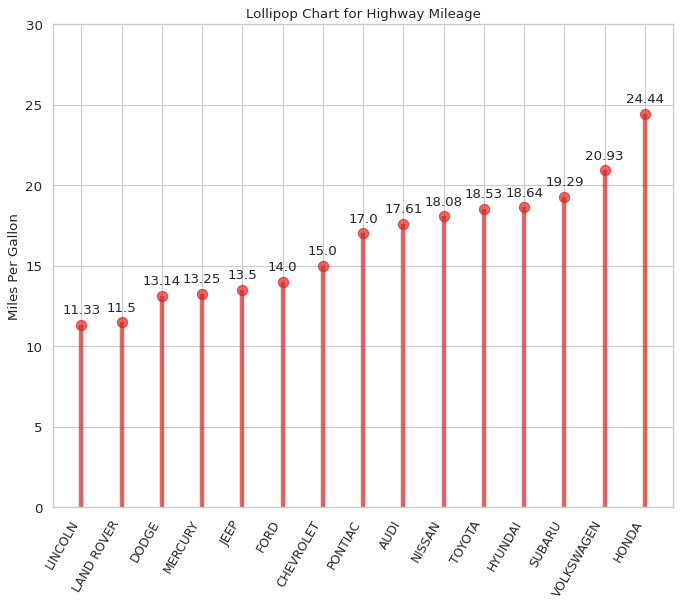

In [29]:
df = mpg[['cty',
             'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(10, 8), dpi=80)
ax.vlines(x=df.index,
          ymin=0,
          ymax=df.cty,
          color='#dc2624',
          alpha=0.7,
          linewidth=4)
ax.scatter(x=df.index, y=df.cty, s=85, color='#dc2624', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size': 12})

plt.ylabel('Miles Per Gallon', fontsize=12)
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(),
                   rotation=60,
                   fontdict={
                       'horizontalalignment': 'right',
                       'size': 11
                   })
ax.set_ylim(0, 30)
plt.yticks(fontsize=12)

# Annotate
for row in df.itertuples():
    ax.text(row.Index,
            row.cty + .5,
            s=round(row.cty, 2),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=12)

plt.show()

<ipython-input-30-ec367636209f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())


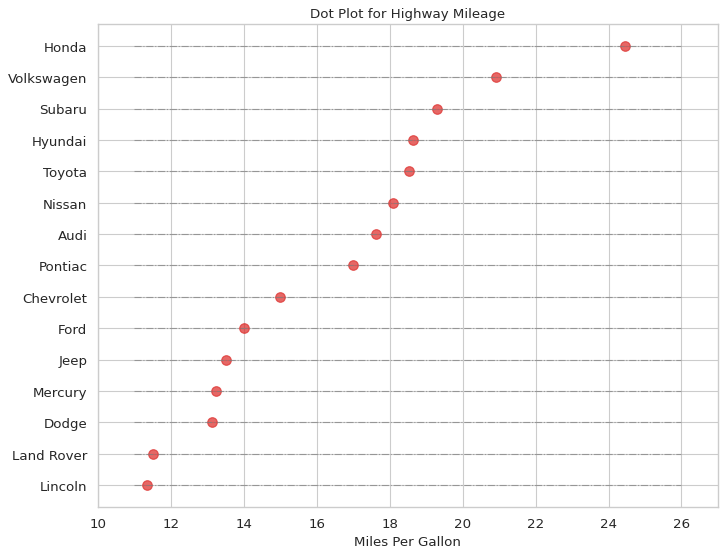

In [30]:
df = mpg[['cty',
             'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(10, 8), dpi=80)
ax.hlines(y=df.index,
          xmin=11,
          xmax=26,
          color='gray',
          alpha=0.7,
          linewidth=1,
          linestyles='dashdot')
ax.scatter(y=df.index, x=df.cty, s=75, color='#dc2624', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size': 12})

plt.xlabel('Miles Per Gallon', fontsize=12)

ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(),
                   fontdict={
                       'horizontalalignment': 'right',
                       'fontsize': 12
                   })

plt.xticks(fontsize=12)
ax.set_xlim(10, 27)
plt.show()

In [31]:
gdp = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv')
gdp.head()

,continent,1952,1957
0,Africa,1252.572466,1385.236062
1,Americas,4079.062552,4616.043733
2,Asia,5195.484004,4003.132940
3,Europe,5661.057435,6963.012816
4,Oceania,10298.085650,11598.522455


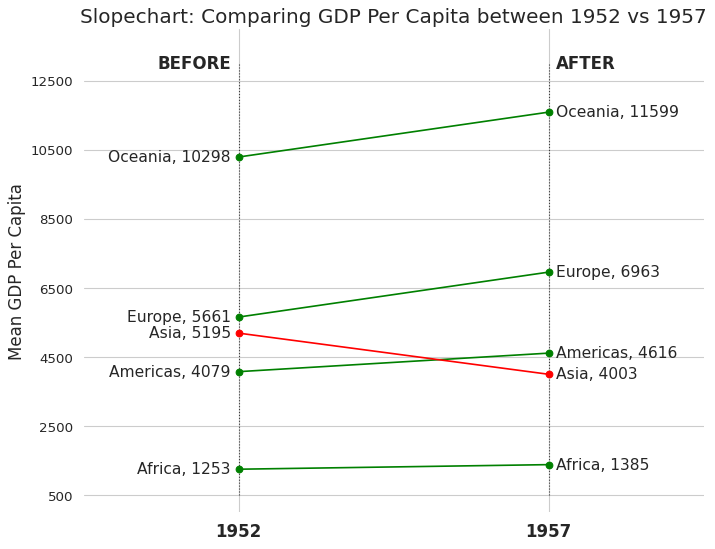

In [33]:
import matplotlib.lines as mlines

df = gdp

left_label = [
    str(c) + ', ' + str(round(y)) for c, y in zip(df.continent, df['1952'])
]
right_label = [
    str(c) + ', ' + str(round(y)) for c, y in zip(df.continent, df['1957'])
]
klass = [
    'red' if (y1 - y2) < 0 else 'green'
    for y1, y2 in zip(df['1952'], df['1957'])
]


# draw line
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]],
                      color='red' if p1[1] - p2[1] > 0 else 'green',
                      marker='o',
                      markersize=6)
    ax.add_line(l)
    return l


fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=80)

# Vertical Lines
ax.vlines(x=1,
          ymin=500,
          ymax=13000,
          color='black',
          alpha=0.7,
          linewidth=1,
          linestyles='dotted')
ax.vlines(x=3,
          ymin=500,
          ymax=13000,
          color='black',
          alpha=0.7,
          linewidth=1,
          linestyles='dotted')

# Points
ax.scatter(y=df['1952'],
           x=np.repeat(1, df.shape[0]),
           s=10,
           color='black',
           alpha=0.7)
ax.scatter(y=df['1957'],
           x=np.repeat(3, df.shape[0]),
           s=10,
           color='black',
           alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1, p1], [3, p2])
    ax.text(1 - 0.05,
            p1,
            c + ', ' + str(round(p1)),
            horizontalalignment='right',
            verticalalignment='center',
            fontdict={'size': 14})
    ax.text(3 + 0.05,
            p2,
            c + ', ' + str(round(p2)),
            horizontalalignment='left',
            verticalalignment='center',
            fontdict={'size': 14})

# 'Before' and 'After' Annotations
ax.text(1 - 0.05,
        13000,
        'BEFORE',
        horizontalalignment='right',
        verticalalignment='center',
        fontdict={
            'size': 15,
            'weight': 700
        })
ax.text(3 + 0.05,
        13000,
        'AFTER',
        horizontalalignment='left',
        verticalalignment='center',
        fontdict={
            'size': 15,
            'weight': 700
        })

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957",
             fontdict={'size': 18})
ax.set(xlim=(0, 4), ylim=(0, 14000), ylabel='Mean GDP Per Capita')
plt.ylabel('Mean GDP Per Capita', fontsize=15)
ax.set_xticks([1, 3])
ax.set_xticklabels(["1952", "1957"], fontdict={'size': 15, 'weight': 700})
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


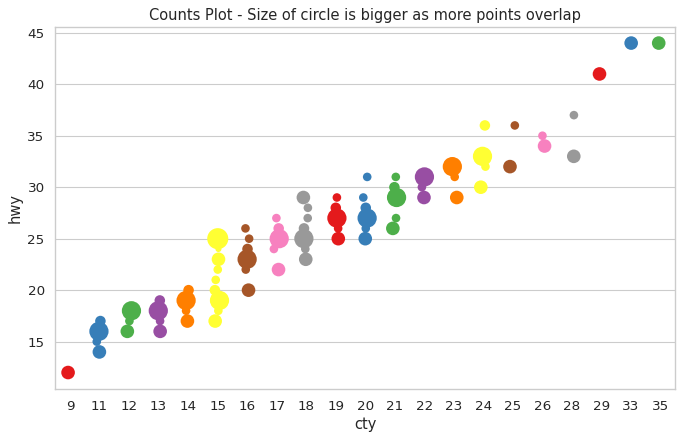

In [34]:
df = mpg
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')
# Draw Stripplot
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
sns.stripplot(df_counts.cty,
              df_counts.hwy,
              sizes=df_counts.counts * 30,
              ax=ax,
              palette='Set1')

# Decorations
sns.set(style="whitegrid", font_scale=1.1)
plt.title('Counts Plot - Size of circle is bigger as more points overlap')
plt.show()

<ipython-input-35-6ada4c42ef8a>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_main.set_xticklabels(xlabels)


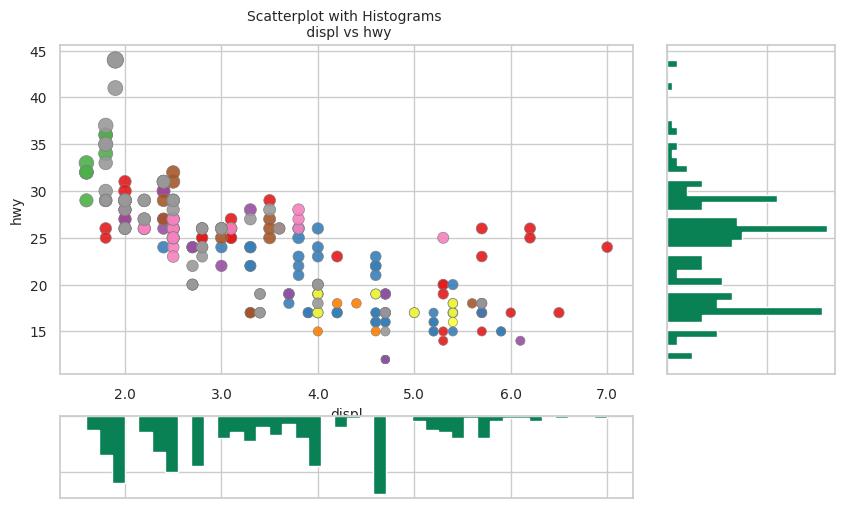

In [35]:
# Create Fig and gridspec
fig = plt.figure(figsize=(10, 6), dpi=100)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ',
                'hwy',
                s=df.cty * 4,
                c=df.manufacturer.astype('category').cat.codes,
                alpha=.9,
                data=df,
                cmap="Set1",
                edgecolors='gray',
                linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ,
               40,
               histtype='stepfilled',
               orientation='vertical',
               color='#098154')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy,
              40,
              histtype='stepfilled',
              orientation='horizontal',
              color='#098154')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy',
            xlabel='displ',
            ylabel='hwy')
ax_main.title.set_fontsize(10)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] +
             ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(10)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

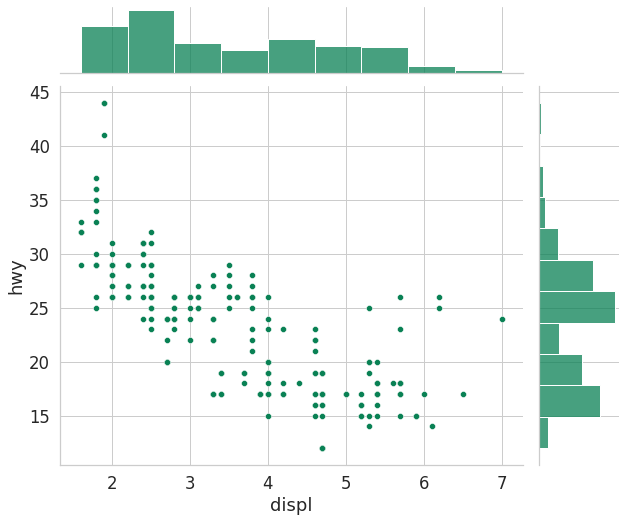

In [36]:
sns.set(style="whitegrid", font_scale=1.5)
g = sns.jointplot(
    x='displ',
    y='hwy',
    data=df,
    color='#098154',
)
g.fig.set_size_inches(10, 8)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


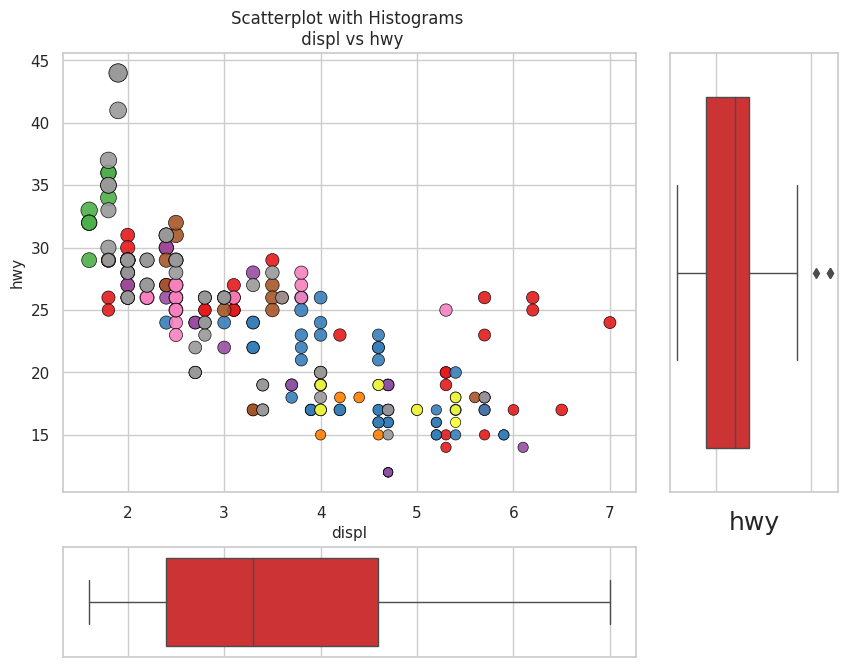

In [37]:
# Create Fig and gridspec
fig = plt.figure(figsize=(10, 8), dpi=100)
grid = plt.GridSpec(
    4, 4, hspace=0.5, wspace=0.2
)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ',
                'hwy',
                s=df.cty * 5,
                c=df.manufacturer.astype('category').cat.codes,
                alpha=.9,
                data=df,
                cmap="Set1",
                edgecolors='black',
                linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v", linewidth=1, palette='Set1')
sns.boxplot(df.displ, ax=ax_bottom, orient="h", linewidth=1, palette='Set1')

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy',
            xlabel='displ',
            ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(12)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] +
             ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(11)

plt.show()

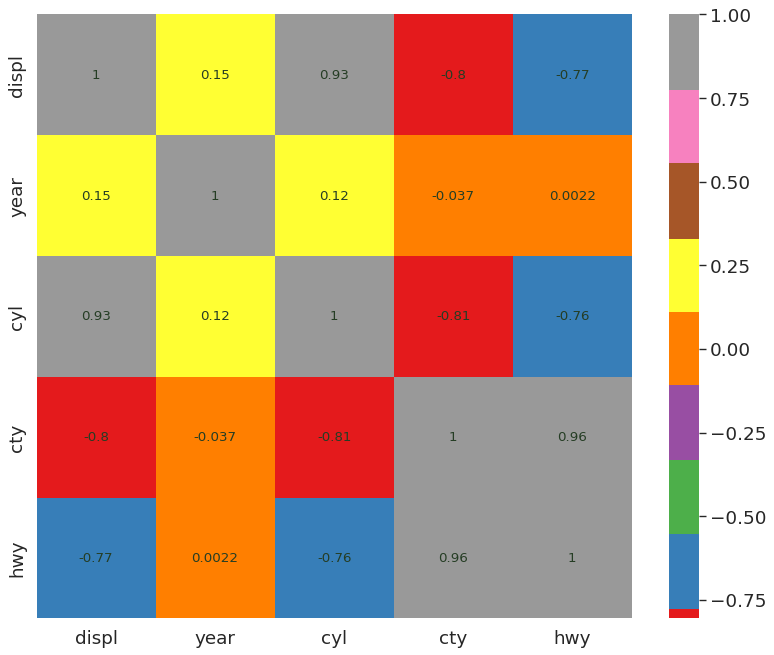

In [38]:
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(
    df.corr(),
    xticklabels=df.corr().columns,
    yticklabels=df.corr().columns,
    cmap='Set1',
    center=0,
    annot=True,
    annot_kws={
        'size': 12,
        'weight': 'normal',
        'color': '#253D24'
    },
)
plt.show()

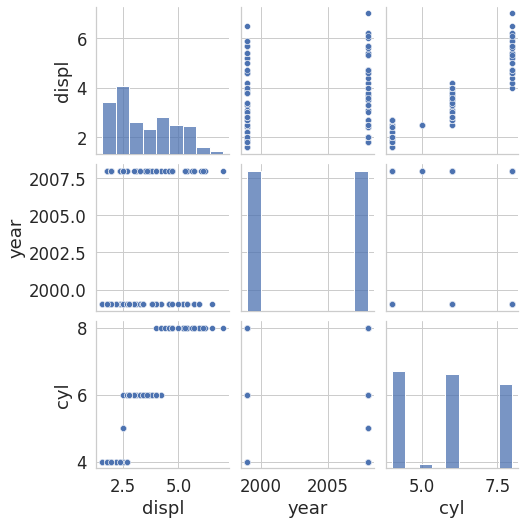

In [39]:
sns.pairplot(df.iloc[:,:5])
plt.show()